In [254]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

### 1. Import/Load the Data

In [255]:
#Loading the Loan Application DataSet
application_df = pd.read_csv("application_data.csv")
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /

### 2. Basic Santiy Check

In [256]:
#Checking the shape (No of Rows and Columns present) of the Dataset 
application_df.shape

(307511, 122)

In [257]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [258]:
#Checking Datatype of Columns
application_df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [259]:
#Checking the summary of the columns having integar values
application_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,...,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,...,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,...,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.977752,0.755746,0.044595,0.078078,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192

##### It has been observed that 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH' & 'DAYS_LAST_PHONE_CHANGE' columns have negative values, which is not not practically possible. Hence onverting all the negative values into positive and divide these values by 365 to convert days into year.

In [260]:
days_columns = ['DAYS_BIRTH' ,'DAYS_EMPLOYED' ,'DAYS_REGISTRATION' ,'DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']
application_df[days_columns] = application_df[days_columns].abs()
application_df[days_columns] = application_df[days_columns]/365
application_df[days_columns].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000
mean,43.936973,185.547239,13.660604,8.203294,2.637969
std,11.956133,382.037676,9.651743,4.135481,2.265229
min,20.517808,0.000000,0.000000,0.000000,0.000000
25%,34.008219,2.556164,5.506849,4.712329,0.750685
50%,43.150685,6.079452,12.339726,8.915068,2.073973
75%,53.923288,15.635616,20.491781,11.778082,4.301370
max,69.120548,1000.665753,67.594521,19.717808,11.758904


In [261]:
#Checking type of Gender present
application_df["CODE_GENDER"].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

##### Since majority of Gender is Female and there are 4 rows having XNA values, we are updating those 4 columns with Gender 'F' as this will have no impact on the dataset

In [262]:
#Replacing 'XNA' value column with 'F'
application_df.loc[application_df['CODE_GENDER']=='XNA', 'CODE_GENDER'] = 'F'
application_df['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

### 3. Missing Value Check

In [263]:
#Checking the percentage of Missing Values
missing_value_perct = (application_df.isnull().sum()/len(application_df))*100
missing_value_perct.sort_values(ascending=False).head(60)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [264]:
##Cleaning the Missing Value columns
#Displaying columns with null value percentage 
column_with_null_value_perct = (100*application_df.isnull().sum()/len(application_df)).reset_index().rename(columns={"index":"column_name",0:"% missing"})
column_with_null_value_perct

,column_name,% missing
0,SK_ID_CURR,0.000000
1,TARGET,0.000000
2,NAME_CONTRACT_TYPE,0.000000
3,CODE_GENDER,0.000000
4,FLAG_OWN_CAR,0.000000
...,...,...
117,AMT_REQ_CREDIT_BUREAU_DAY,13.501631
118,AMT_REQ_CREDIT_BUREAU_WEEK,13.501631
119,AMT_REQ_CREDIT_BUREAU_MON,13.501631
120,AMT_REQ_CREDIT_BUREAU_QRT,13.501631


In [265]:
#Display the columns having missing values more than 40%
display_columns = list(column_with_null_value_perct[column_with_null_value_perct["% missing"]>=40]["column_name"])
display_columns

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

### 4. Data Cleaning

In [266]:
#Removing missing value columns considering threshold as 40% 
application_df = application_df.drop(display_columns,axis=1) 

In [267]:
#Checking no of columns (73 instead of 122) after removing columns having null values more than 40%
application_df.shape

(307511, 73)

### 5. Data Imbalance

In [268]:
##Ratio of Data Imbalance
round(100*application_df["TARGET"].value_counts(normalize=True),2)
#In application_data dataset 91.93% customers comes under 'Non-Defaulter' category and 8.07% customers lies under 'Defaulter' category.

0    91.93
1     8.07
Name: TARGET, dtype: float64

### 6. Univariate Analysis

##### Segmentation by 'Target' Variable (target_0 = Non-Defaulter, target_1 = Defaulter)

In [269]:
target_0 = application_df.loc[application_df.TARGET == 0]
target_1 = application_df.loc[application_df.TARGET == 1]

##### Gender Wise Client Distribution

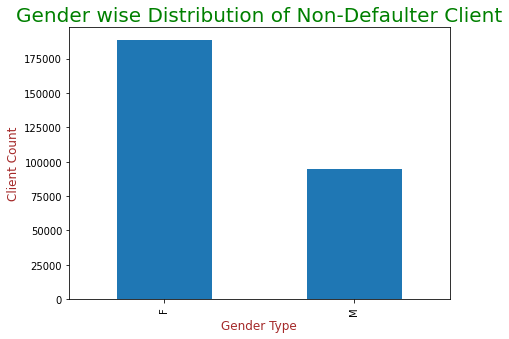

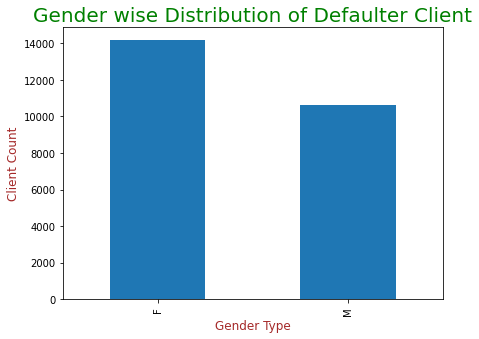

In [270]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title("Gender wise Distribution of Non-Defaulter Client", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Gender Type", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Client Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
target_0["CODE_GENDER"].value_counts().plot.bar()
plt.xticks(rotation=90)

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title("Gender wise Distribution of Defaulter Client", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Gender Type", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Client Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
target_1["CODE_GENDER"].value_counts().plot.bar()
plt.xticks(rotation=90)
plt.show()

Financial Institutions should focus on Male Clients who are likely to repay loan

##### Client Income Type Wise Distribution

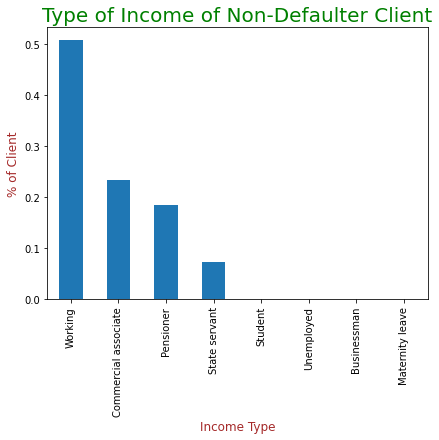

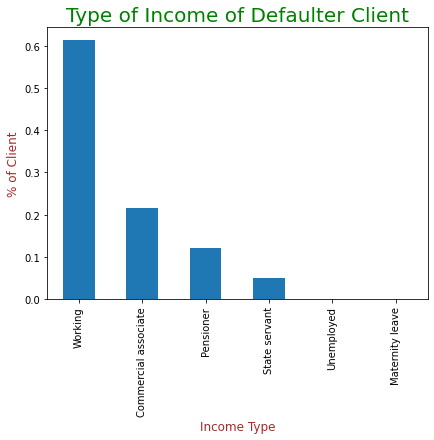

In [271]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title("Type of Income of Non-Defaulter Client", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Income Type", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("% of Client", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
target_0["NAME_INCOME_TYPE"].value_counts(normalize=True).plot.bar()

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title("Type of Income of Defaulter Client", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Income Type", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("% of Client", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
target_1["NAME_INCOME_TYPE"].value_counts(normalize=True).plot.bar()
plt.xticks(rotation=90)
plt.show()

Financial Institutions should approve loan to Student and Businessman on priority who are likely to repay loan

##### Client Education Type Wise Distribution

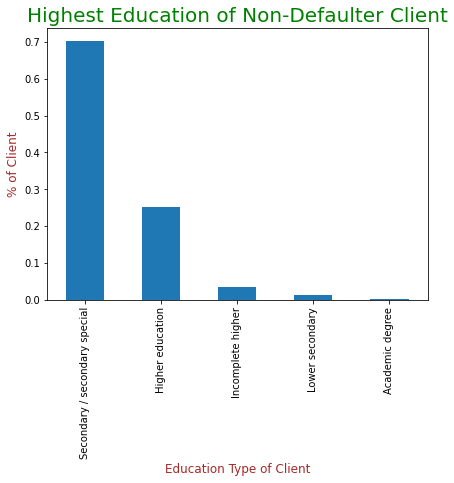

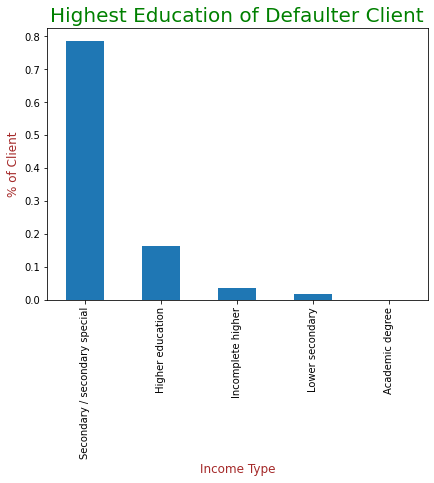

In [272]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title("Highest Education of Non-Defaulter Client", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Education Type of Client", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("% of Client", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
target_0["NAME_EDUCATION_TYPE"].value_counts(normalize=True).plot.bar()

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title("Highest Education of Defaulter Client", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Income Type", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("% of Client", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
target_1["NAME_EDUCATION_TYPE"].value_counts(normalize=True).plot.bar()
plt.xticks(rotation=90)
plt.show()

Financial Institution should process loan to Client having Academic degree as ver few/negligible % of Client having Academic degree are found to be defaulter.

##### Region Wise Distribution

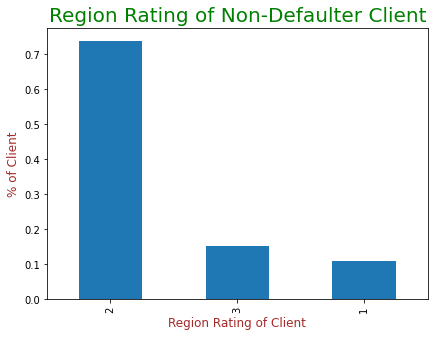

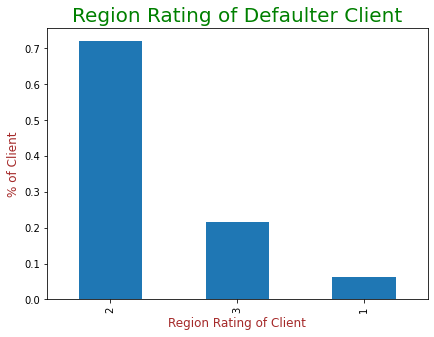

In [273]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title("Region Rating of Non-Defaulter Client", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Region Rating of Client", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("% of Client", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
target_0["REGION_RATING_CLIENT"].value_counts(normalize=True).plot.bar()

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title("Region Rating of Defaulter Client", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Region Rating of Client", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("% of Client", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
target_1["REGION_RATING_CLIENT"].value_counts(normalize=True).plot.bar()
plt.xticks(rotation=90)
plt.show()

Client lives in Region 1 have a very less % (Less than 5%) to become a loan defaulter. Hence, it is suggested to give preference to provide loan to Client living in Region 1.

##### City Wise Distribution

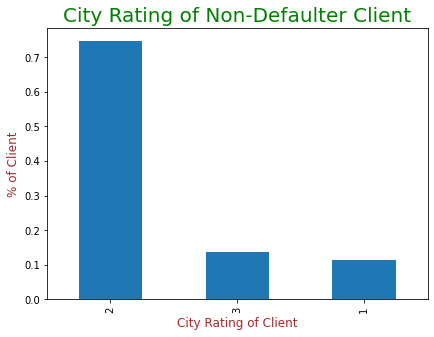

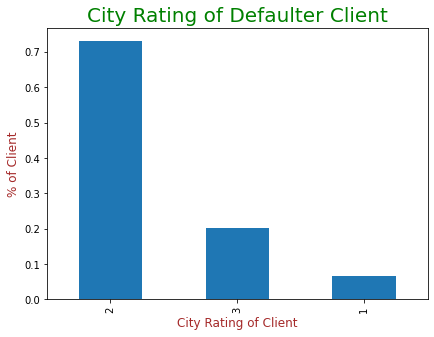

In [274]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title("City Rating of Non-Defaulter Client", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("City Rating of Client", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("% of Client", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
target_0["REGION_RATING_CLIENT_W_CITY"].value_counts(normalize=True).plot.bar()

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title("City Rating of Defaulter Client", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("City Rating of Client", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("% of Client", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
target_1["REGION_RATING_CLIENT_W_CITY"].value_counts(normalize=True).plot.bar()
plt.xticks(rotation=90)
plt.show()

Client lives in City 1 have a very less % (Less than 5%) to become a loan defaulter. Hence, it is suggested to give preference to provide loan to Client living in City 1.

### 7. Bivariate Analysis

### 7.1 Bivariate Analysis on Categorical Vs. Numerical Variables

##### Client Accompany Status Vs. Loan Credit Amount

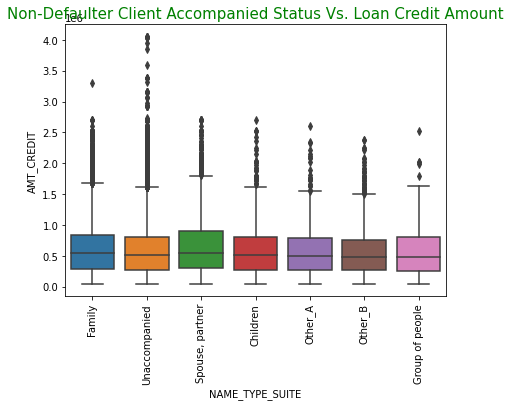

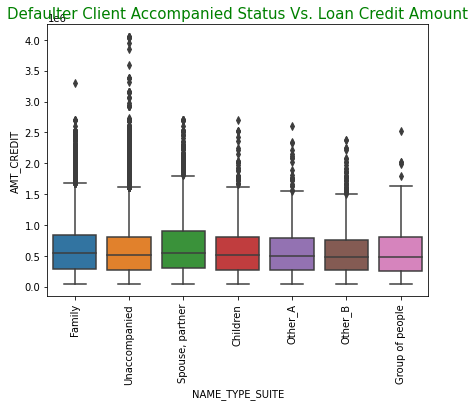

In [275]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title("Non-Defaulter Client Accompanied Status Vs. Loan Credit Amount", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Green'})
sns.boxplot(data = target_0, x='NAME_TYPE_SUITE', y='AMT_CREDIT')
plt.xticks(rotation=90)

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title("Defaulter Client Accompanied Status Vs. Loan Credit Amount", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Green'})
sns.boxplot(data = target_0, x='NAME_TYPE_SUITE', y='AMT_CREDIT')
plt.xticks(rotation=90)
plt.show()

Financial Institution should give preference to client accoompanied by Spouse/Partner as they have the highest median value and third quartile i.e. upper bound is also found to be high.

##### Client Income Type Vs. Annuity Amount

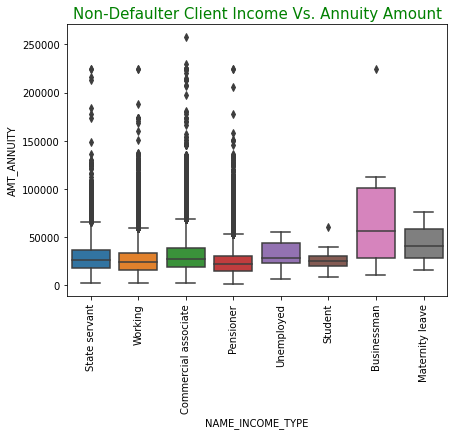

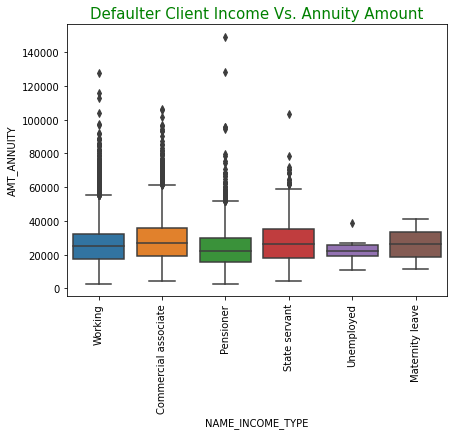

In [276]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title("Non-Defaulter Client Income Vs. Annuity Amount", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Green'})
sns.boxplot(data = target_0, x='NAME_INCOME_TYPE', y='AMT_ANNUITY')
plt.xticks(rotation=90)

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title("Defaulter Client Income Vs. Annuity Amount", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Green'})
sns.boxplot(data = target_1, x='NAME_INCOME_TYPE', y='AMT_ANNUITY')
plt.xticks(rotation=90)
plt.show()

Annuity (EMI) Amount of Businessman is found to be the highest and they have never faced in payment difficulties. Hence preference should be given to businessman during loan approval.

##### Client Income Type Vs. Goods Price

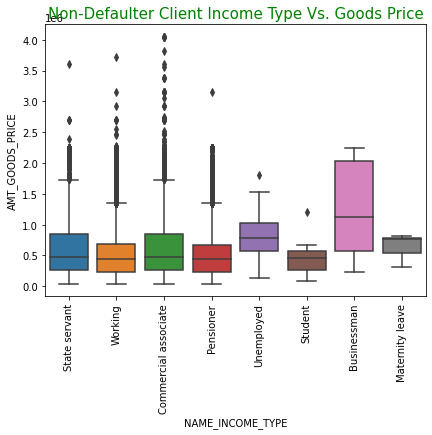

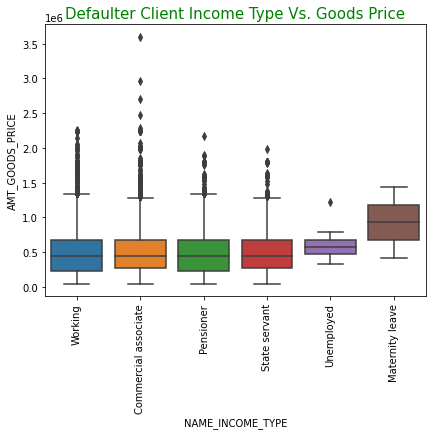

In [277]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title("Non-Defaulter Client Income Type Vs. Goods Price", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Green'})
sns.boxplot(data = target_0, x='NAME_INCOME_TYPE', y='AMT_GOODS_PRICE')
plt.xticks(rotation=90)

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title("Defaulter Client Income Type Vs. Goods Price", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Green'})
sns.boxplot(data = target_1, x='NAME_INCOME_TYPE', y='AMT_GOODS_PRICE')
plt.xticks(rotation=90)
plt.show()

Businessman has been given the highest amount of loan and they have never faced in payment difficulties in rapying. Hence preference should be given to businessman during loan approval.

##### Client Education Type Vs. Goods Price

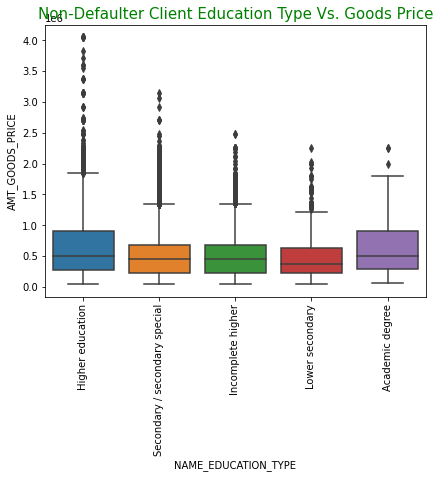

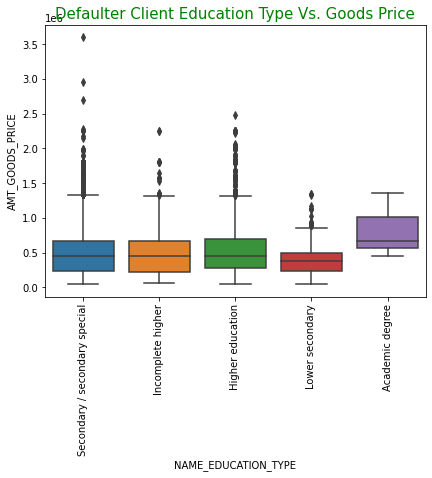

In [278]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title("Non-Defaulter Client Education Type Vs. Goods Price", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Green'})
sns.boxplot(data = target_0, x='NAME_EDUCATION_TYPE', y='AMT_GOODS_PRICE')
plt.xticks(rotation=90)

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title("Defaulter Client Education Type Vs. Goods Price", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Green'})
sns.boxplot(data = target_1, x='NAME_EDUCATION_TYPE', y='AMT_GOODS_PRICE')
plt.xticks(rotation=90)
plt.show()

Client having higher education and academic degree have given considerably high loan amount whereas client having academic degree are more likely to be defaulter. Hence, preference should be given to client with higher education when issuing higher loan amount.

##### Client Family Status Vs. Annuity Amount

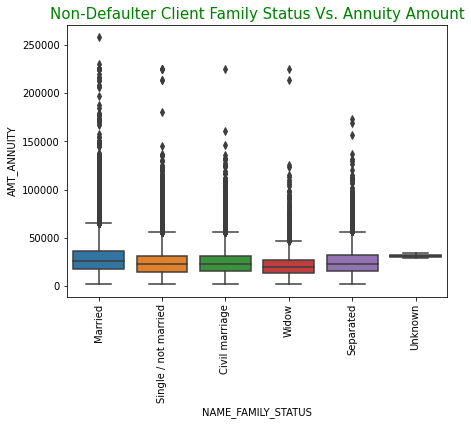

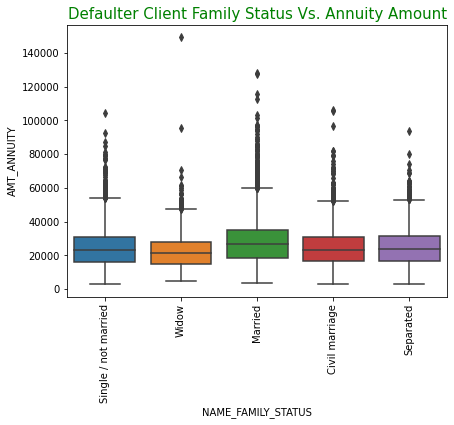

In [279]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title("Non-Defaulter Client Family Status Vs. Annuity Amount", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Green'})
sns.boxplot(data = target_0, x='NAME_FAMILY_STATUS', y='AMT_ANNUITY')
plt.xticks(rotation=90)

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title("Defaulter Client Family Status Vs. Annuity Amount", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Green'})
sns.boxplot(data = target_1, x='NAME_FAMILY_STATUS', y='AMT_ANNUITY')
plt.xticks(rotation=90)
plt.show()

Both Married and Separated clients are paying high EMI amount whereas Married clients are more often facing payment difficulties. On the other hand, widow clients are paying lesser EMI amount but consistent in repaying loan. Hence, Separated and Widow client should be given preference for approving loan 

##### Client Housing Type Vs. Annuity Amount

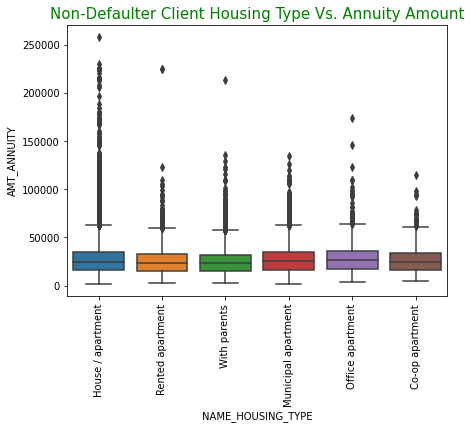

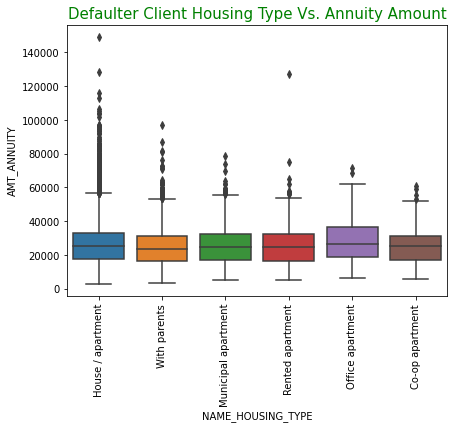

In [280]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title("Non-Defaulter Client Housing Type Vs. Annuity Amount", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Green'})
sns.boxplot(data = target_0, x='NAME_HOUSING_TYPE', y='AMT_ANNUITY')
plt.xticks(rotation=90)

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title("Defaulter Client Housing Type Vs. Annuity Amount", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Green'})
sns.boxplot(data = target_1, x='NAME_HOUSING_TYPE', y='AMT_ANNUITY')
plt.xticks(rotation=90)
plt.show()

Clients having own House/Apartment and Office Apartment are paying the highest EMI amount whereas Clients having Office Apartment are more likely to become loan defaulter. Hence, Clients having own House/Apartment should be prioritized in sanctioning loan.

##### Client Children Count Vs. Annuity Amount

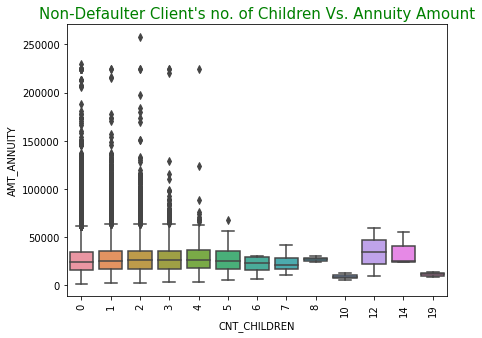

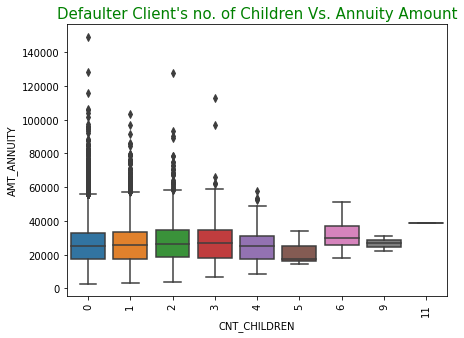

In [281]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title("Non-Defaulter Client's no. of Children Vs. Annuity Amount", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Green'})
sns.boxplot(data = target_0, x='CNT_CHILDREN', y='AMT_ANNUITY')
plt.xticks(rotation=90)

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title("Defaulter Client's no. of Children Vs. Annuity Amount", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Green'})
sns.boxplot(data = target_1, x='CNT_CHILDREN', y='AMT_ANNUITY')
plt.xticks(rotation=90)
plt.show()

Client having 2 to 4 children are found to be more consistent non-defaulter.

##### Client Contract Type Vs. Goods Price

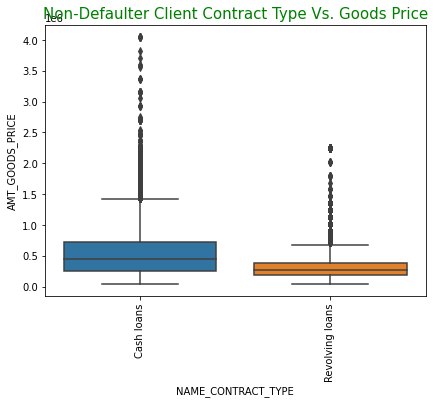

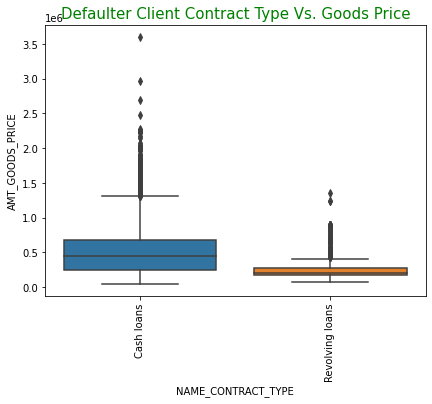

In [282]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title("Non-Defaulter Client Contract Type Vs. Goods Price", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Green'})
sns.boxplot(data = target_0, x='NAME_CONTRACT_TYPE', y='AMT_GOODS_PRICE')
plt.xticks(rotation=90)

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title("Defaulter Client Contract Type Vs. Goods Price", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Green'})
sns.boxplot(data = target_1, x='NAME_CONTRACT_TYPE', y='AMT_GOODS_PRICE')
plt.xticks(rotation=90)
plt.show()

Revolving loan of smaller amount should be prioritized over cash loan of higher amount.

##### Gender Type Vs. Loan Credit Amount

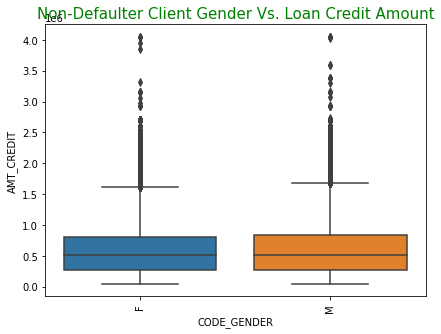

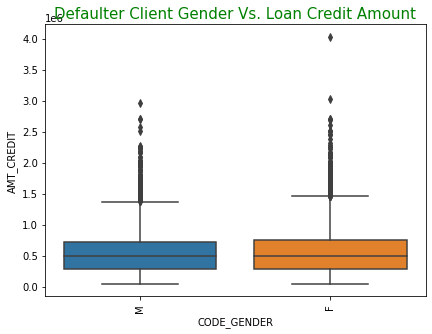

In [283]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title("Non-Defaulter Client Gender Vs. Loan Credit Amount", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Green'})
sns.boxplot(data = target_0, x='CODE_GENDER', y='AMT_CREDIT')
plt.xticks(rotation=90)

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title("Defaulter Client Gender Vs. Loan Credit Amount", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Green'})
sns.boxplot(data = target_1, x='CODE_GENDER', y='AMT_CREDIT')
plt.xticks(rotation=90)
plt.show()

Male clients should be given preference over Female clients as they are eligible to access more credit amount from the money loaned and found to be non-defaulter of loan. On the contrary, Female clients who are eligible to access more credit amount from the money loaned are likely to become loan defaulter.

### 7.2 Bivariate Analysis on Numerical Variables

##### Client Total Income Vs. Annuity Amount

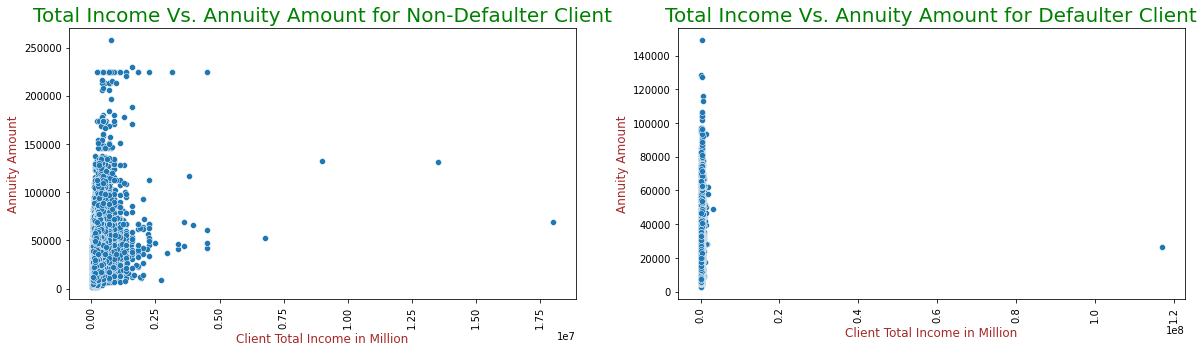

In [284]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Total Income Vs. Annuity Amount for Non-Defaulter Client", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Client Total Income in Million", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Annuity Amount", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
sns.scatterplot(data = target_0, x='AMT_INCOME_TOTAL', y='AMT_ANNUITY')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title("Total Income Vs. Annuity Amount for Defaulter Client", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Client Total Income in Million", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Annuity Amount", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
sns.scatterplot(data = target_1, x='AMT_INCOME_TOTAL', y='AMT_ANNUITY')
plt.xticks(rotation=90)
plt.show()

It is advisable to approve loan to clients having higher total income.

##### Client Total Income Vs. Goods Price

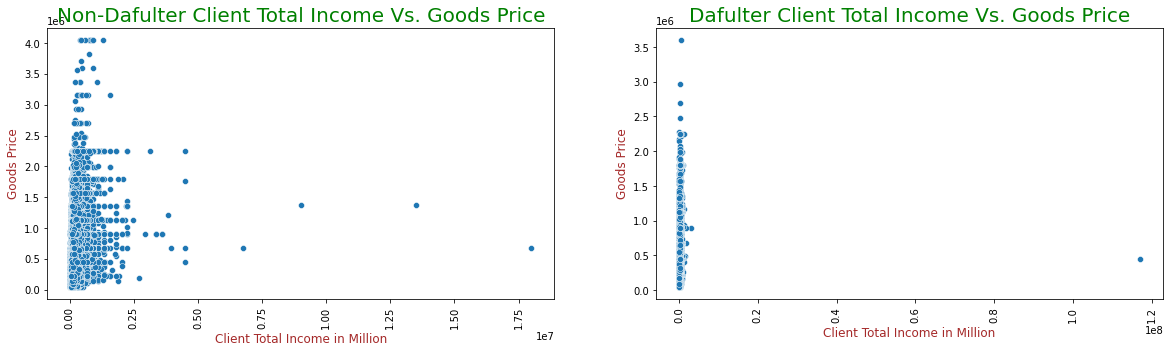

In [285]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Non-Dafulter Client Total Income Vs. Goods Price", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Client Total Income in Million", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Goods Price", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
sns.scatterplot(data = target_0, x='AMT_INCOME_TOTAL', y='AMT_GOODS_PRICE')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title("Dafulter Client Total Income Vs. Goods Price", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Client Total Income in Million", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Goods Price", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
sns.scatterplot(data = target_1, x='AMT_INCOME_TOTAL', y='AMT_GOODS_PRICE')
plt.xticks(rotation=90)
plt.show()

It is advisable to approve loan to clients earning high.

### 8. Outlier Findings

### 8.1 Total Income Amount (AMT_INCOME_TOTAL)

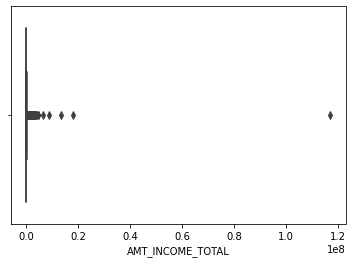

In [286]:
sns.boxplot(application_df['AMT_INCOME_TOTAL'])
plt.show()
# Income of the client has one value of 117 Million which is found to be an outlier.

### 8.2 Amount Annuity (AMT_ANNUITY)

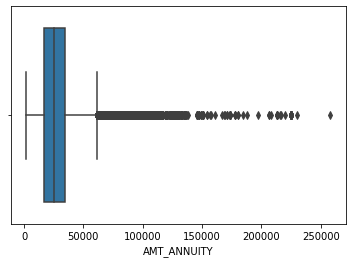

In [287]:
sns.boxplot(application_df['AMT_ANNUITY'])
plt.show()
# Annuity Amount of one of the client has found to be 2,58,025 which is an outlier.

### 8.3 Count of Children (CNT_CHILDREN)



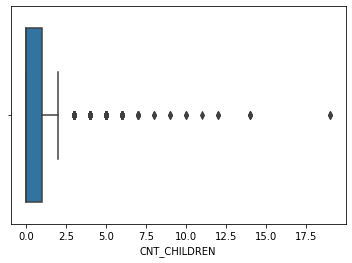

In [288]:
sns.boxplot(application_df['CNT_CHILDREN'])
plt.show()
# One of the Client having 19 nos. of Children which found to be an outlier.

### 8.4 Years of Employment (DAYS_EMPLOYED)


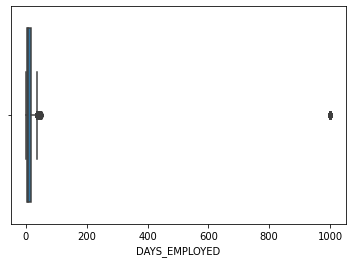

In [289]:
sns.boxplot(application_df['DAYS_EMPLOYED'])
plt.show()
# Years of Employment has a value of 1000 years which is surely an outlier.

### 8.5 Years of Registration (DAYS_REGISTRATION)

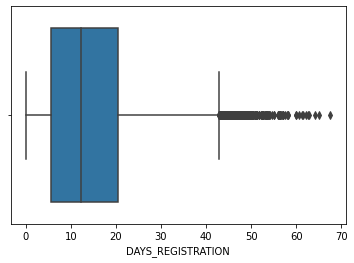

In [290]:
sns.boxplot(application_df['DAYS_REGISTRATION'])
plt.show()
# One of the Clint have registered more than 67 years back which is an outlier.

### 8.6 Last Phone Change (DAYS_LAST_PHONE_CHANGE)

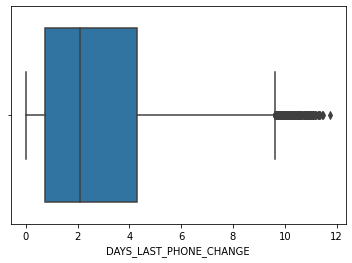

In [291]:
sns.boxplot(application_df['DAYS_LAST_PHONE_CHANGE'])
plt.show()
# Last Phone Change Days has a value close to 11.75 years which seems to beyond the normal value range and we can consider this as an outlier.

### 9. Exploratory Data Analysis on Previous Loan Application Data

In [292]:
#Loading the Previous Loan Application DataSet
prev_app_df = pd.read_csv('previous_application.csv')
prev_app_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [293]:
#Checking the shape (No of Rows and Columns present) of the Previous Application Dataset 
prev_app_df.shape

(1670214, 37)

In [294]:
prev_app_df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [295]:
#Checking the info of the previous application dataset
prev_app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [296]:
#Checking the percentage of Missing Values
missing_value_perct = (prev_app_df.isnull().sum()/len(prev_app_df))*100
missing_value_perct.sort_values(ascending=False).head(60)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [297]:
##Cleaning the Missing Value columns
#Displaying columns with null value percentage 
column_with_null_value_perct = (100*prev_app_df.isnull().sum()/len(prev_app_df)).reset_index().rename(columns={"index":"column_name",0:"% missing"})
column_with_null_value_perct

,column_name,% missing
0,SK_ID_PREV,0.000000
1,SK_ID_CURR,0.000000
2,NAME_CONTRACT_TYPE,0.000000
3,AMT_ANNUITY,22.286665
4,AMT_APPLICATION,0.000000
5,AMT_CREDIT,0.000060
6,AMT_DOWN_PAYMENT,53.636480
7,AMT_GOODS_PRICE,23.081773
8,WEEKDAY_APPR_PROCESS_START,0.000000
9,HOUR_APPR_PROCESS_START,0.000000


In [298]:
#Display the columns having missing values more than 40%
display_columns = list(column_with_null_value_perct[column_with_null_value_perct["% missing"]>=40]["column_name"])
display_columns

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [299]:
#Removing missing value columns considering threshold as 40% 
prev_app_df = prev_app_df.drop(display_columns,axis=1) 

In [300]:
#Checking no of columns (26 instead of 37) after removing columns having null values more than 40%
prev_app_df.shape

(1670214, 26)

In [301]:
#XNA and XAP to be replaced by NaN
prev_app_df = prev_app_df.replace('XNA', np.NaN)
prev_app_df = prev_app_df.replace('XAP', np.NaN)

### 9.1 Univariate Analysis on Previous Loan Application Data

##### Previous Contract Status of Client

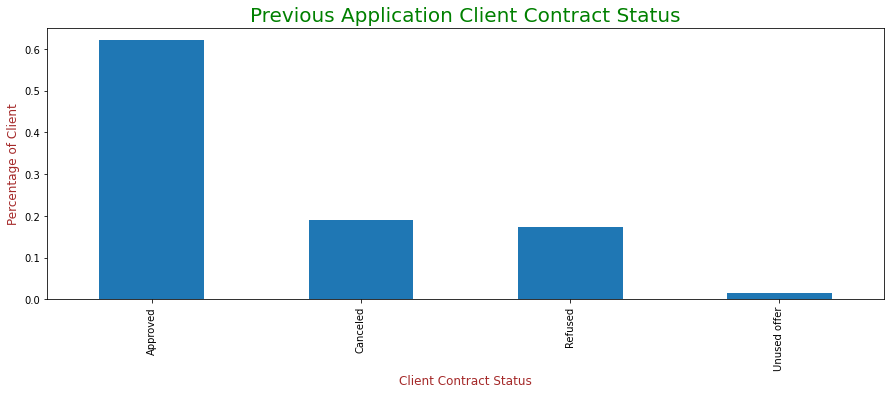

In [302]:
plt.figure(figsize = (15,5))
plt.title("Previous Application Client Contract Status", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Client Contract Status", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Percentage of Client", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
prev_app_df["NAME_CONTRACT_STATUS"].value_counts(normalize=True).plot.bar()
plt.xticks(rotation=90)
plt.show()

More than 60% of previous loan application had approved. Both canceled and refused percentage is less than 20.

##### Previous Application Loan Rejection Reason

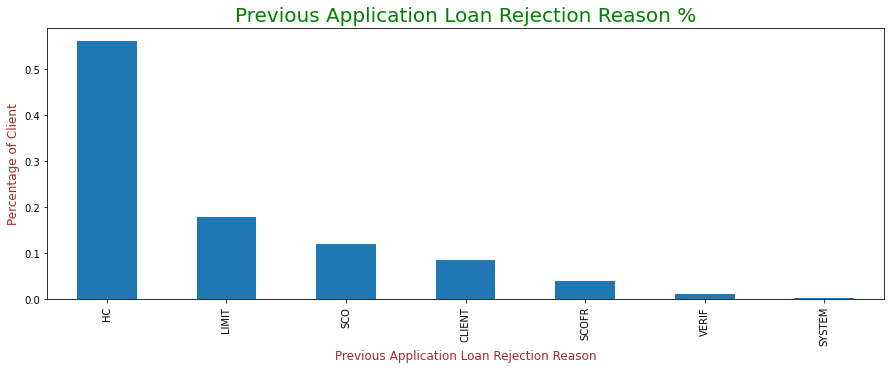

In [303]:
plt.figure(figsize = (15,5))
plt.title("Previous Application Loan Rejection Reason %", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Previous Application Loan Rejection Reason", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Percentage of Client", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
prev_app_df["CODE_REJECT_REASON"].value_counts(normalize=True).plot.bar()
plt.xticks(rotation=90)
plt.show()

Most of previous loan application got rejected due to HC reason followed by LIMIT and SCO reasons respectively.

##### Previous Loan Application Goods Category

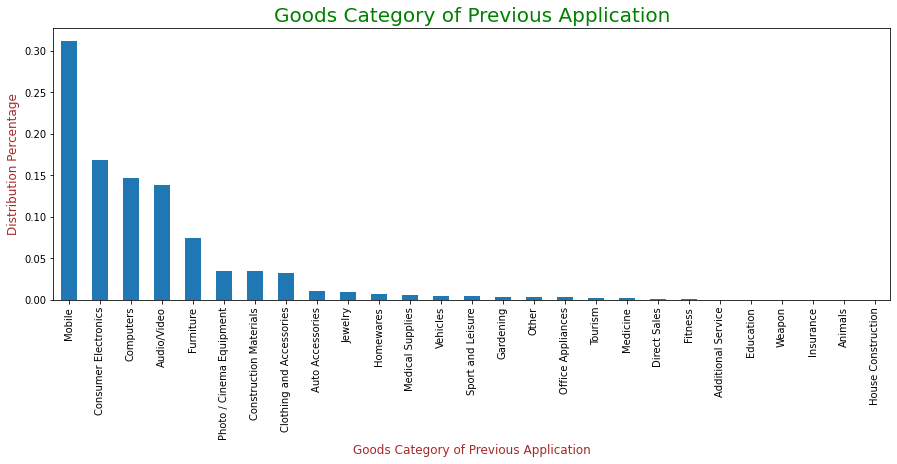

In [304]:
plt.figure(figsize = (15,5))
plt.title("Goods Category of Previous Application", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Goods Category of Previous Application", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Distribution Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
prev_app_df["NAME_GOODS_CATEGORY"].value_counts(normalize=True).plot.bar()
plt.xticks(rotation=90)
plt.show()

As per previous application data, loan has taken mostly to purchase Mobile followed by Consumer Electronics and Computers.

### 9.2 Bivariate Analysis

##### Client Contract Status Vs. Amount Goods Price

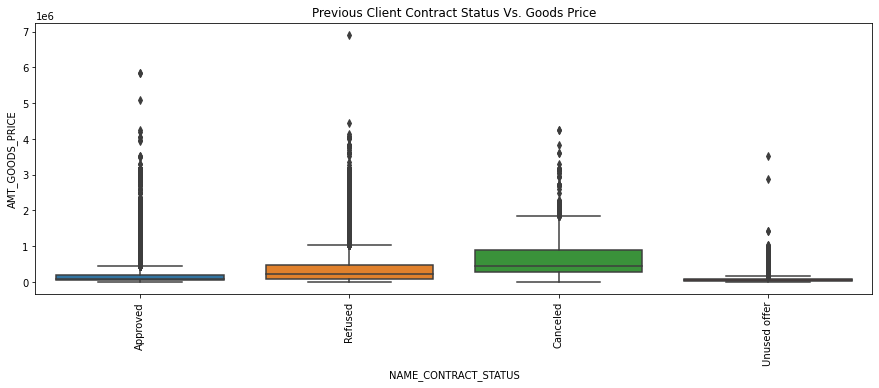

In [305]:
plt.figure(figsize=(15,5))
sns.boxplot (data =prev_app_df, x= 'NAME_CONTRACT_STATUS', y= 'AMT_GOODS_PRICE')
plt.title('Previous Client Contract Status Vs. Goods Price')
plt.xticks(rotation=90)
plt.show()

Loan applied for higher value (Goods price) stand cancelled or refused by the Financial Institution.

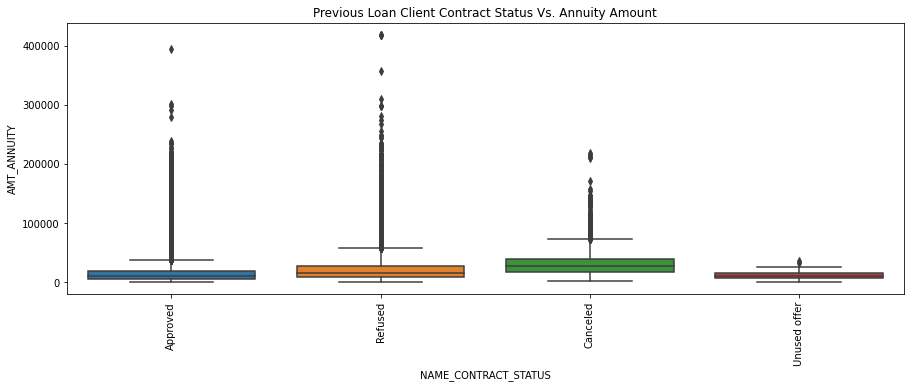

In [306]:
#Contract Status Vs. Amount Goods Price
plt.figure(figsize=(15,5))
sns.boxplot (data = prev_app_df, x= 'NAME_CONTRACT_STATUS', y= 'AMT_ANNUITY')
plt.title('Previous Loan Client Contract Status Vs. Annuity Amount')
plt.xticks(rotation=90)
plt.show()

Client whose loan got approved are paying lesser amount. 